In [2]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

In [3]:
class XORDataset(Dataset):
    def __init__(self, X1, X2, y):
        super().__init__()
        self.X1 = X1.reshape(-1, 1)
        self.X2 = X2.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return self.X1.shape[0]
    
    def __getitem__(self, index):
        return self.X1[index], self.X2[index], self.y[index]

In [4]:
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 2)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2, 1)
        self.activation2 = nn.ReLU()
    
    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim= 1)
        z1 = self.linear1(x)
        a1 = self.activation1(z1)
        z2 = self.linear2(a1)
        a2 = self.activation2(z2)
        return a2

In [5]:
X1 = torch.tensor([0, 0, 1, 1], dtype= torch.float32)
X2 = torch.tensor([0, 1, 0, 1], dtype= torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype= torch.float32)

In [7]:
model = XOR()
dataset = XORDataset(X1= X1, X2= X2, y= y)
dataloader = DataLoader(dataset= dataset, batch_size= dataset.__len__(), shuffle= True)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [8]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input1, input2, target in dataloader:
        optimizer.zero_grad()
        output = model(input1, input2)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'loss = {loss.item()}')
        a = loss
        loss_list.append(a.detach().numpy())

loss = 0.91774982213974
loss = 0.9113035202026367
loss = 0.9051648378372192
loss = 0.8993099927902222
loss = 0.8937177062034607
loss = 0.8883690237998962
loss = 0.8832469582557678
loss = 0.8783358931541443
loss = 0.8736220598220825
loss = 0.8690928220748901
loss = 0.864736795425415
loss = 0.8605434894561768
loss = 0.8565032482147217
loss = 0.852607250213623
loss = 0.848847508430481
loss = 0.8452167510986328
loss = 0.841707706451416
loss = 0.838314414024353
loss = 0.8350306749343872
loss = 0.8318514227867126
loss = 0.82877117395401
loss = 0.8257853388786316
loss = 0.8228896856307983
loss = 0.8200798630714417
loss = 0.8173520565032959
loss = 0.8147028088569641
loss = 0.8121283650398254
loss = 0.8096258640289307
loss = 0.8071921467781067
loss = 0.8048244714736938
loss = 0.8025200963020325
loss = 0.800276517868042
loss = 0.7980915307998657
loss = 0.7959626913070679
loss = 0.7938879728317261
loss = 0.7918652892112732
loss = 0.7898926734924316
loss = 0.7879685759544373
loss = 0.7860910296440

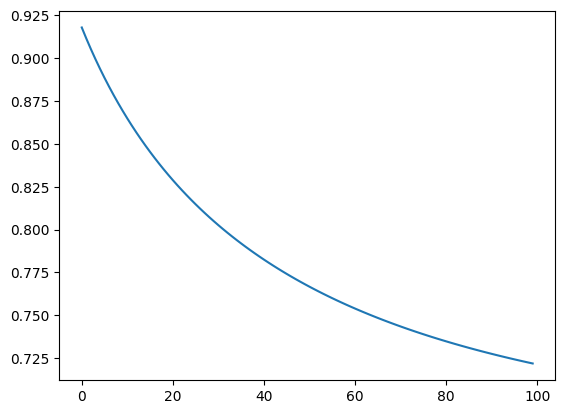

In [9]:
plt.plot(loss_list)
plt.show()